In [1]:
import ast
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [13]:
#import model
model1 = torch.load("modelBraak.pt")
model2 = torch.load("modelBCG.pt")
model3 = torch.load("modelBAS.pt")
model4 = torch.load("modelAll.pt")

#print(model1)
print(model2)
#print(model3)
#print(model4)

OrderedDict({'shared_layer.0.weight': tensor([[-0.0770,  0.0845,  0.0004,  ...,  0.1507,  0.0473, -0.0969],
        [ 0.0082, -0.1031,  0.1995,  ...,  0.2230,  0.1403, -0.1747],
        [ 0.0099,  0.0464,  0.0493,  ...,  0.0201,  0.0969,  0.0277],
        ...,
        [ 0.0371, -0.2428, -0.1293,  ...,  0.0137, -0.1532, -0.0533],
        [-0.1134,  0.0917, -0.0692,  ..., -0.0146, -0.0984, -0.0466],
        [-0.1429, -0.1347,  0.0105,  ...,  0.0693,  0.1691,  0.0577]]), 'shared_layer.0.bias': tensor([-0.4582, -0.8333, -0.9120, -0.7465, -0.8966, -0.9477, -0.6136, -0.2927,
        -0.4329, -0.7523, -0.7906, -0.9075, -0.6324, -0.7641, -0.8656, -0.5737,
        -0.8992, -0.9478, -0.8621, -0.8117, -0.9471, -0.7243, -1.0248, -0.9260,
        -0.7481, -1.0119, -0.3819, -0.5658, -0.6406, -0.7525, -0.7484, -0.9665,
        -0.8204, -0.9159, -0.7348, -0.6264, -0.9737, -0.5238, -0.9693, -0.7754,
        -0.7680, -0.6102, -0.8794, -0.7750, -0.6277, -1.0039, -0.8264, -0.5954,
        -0.9048, -0.7911

In [11]:
def plotModel(model):
    # Get the first layer weights (input -> first hidden layer)
    input_weights = model['linear_relu_stack.0.weight']  # Shape: [n_hidden, n_input]
    
    # Convert to numpy and compute mean absolute weight per input feature
    weight_array = input_weights.detach().cpu().numpy()  # Ensure it's on CPU
    importance = np.mean(np.abs(weight_array), axis=0)   # Mean abs weight across neurons
    
    # Plotting
    plt.figure(figsize=(12, 4))
    plt.bar(range(len(importance)), importance)
    plt.title("Input Feature Importances (Layer 1 Weights)")
    plt.xlabel("Feature Index")
    plt.ylabel("Avg. Absolute Weight")
    plt.tight_layout()
    plt.show()
    
def plotMTLModel(model):
    # Get the first layer weights (input -> first hidden layer)
    input_weights = model['shared_layer.0.weight']  # Shape: [n_hidden, n_input]
    
    # Convert to numpy and compute mean absolute weight per input feature
    weight_array = input_weights.detach().cpu().numpy()  # Ensure it's on CPU
    importance = np.mean(np.abs(weight_array), axis=0)   # Mean abs weight across neurons
    
    # Plotting
    plt.figure(figsize=(12, 4))
    plt.bar(range(len(importance)), importance)
    plt.title("Input Feature Importances (Layer 1 Weights)")
    plt.xlabel("Feature Index")
    plt.ylabel("Avg. Absolute Weight")
    plt.tight_layout()
    plt.show()

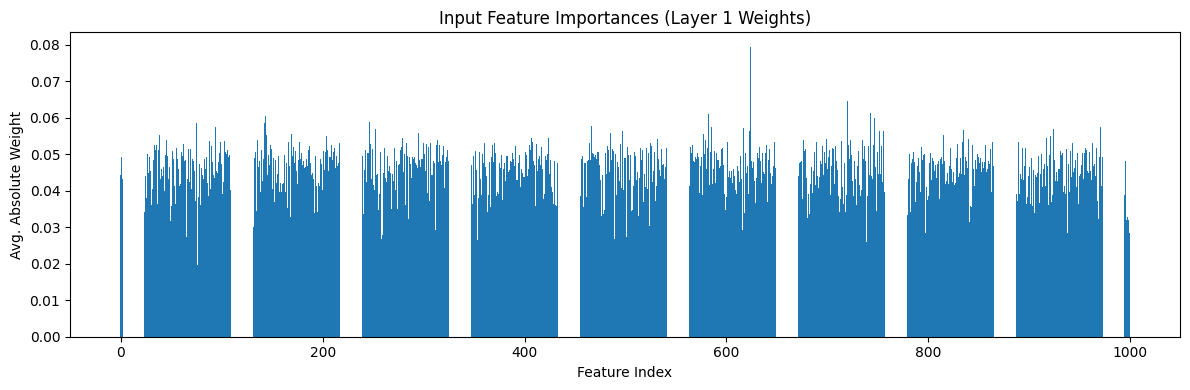

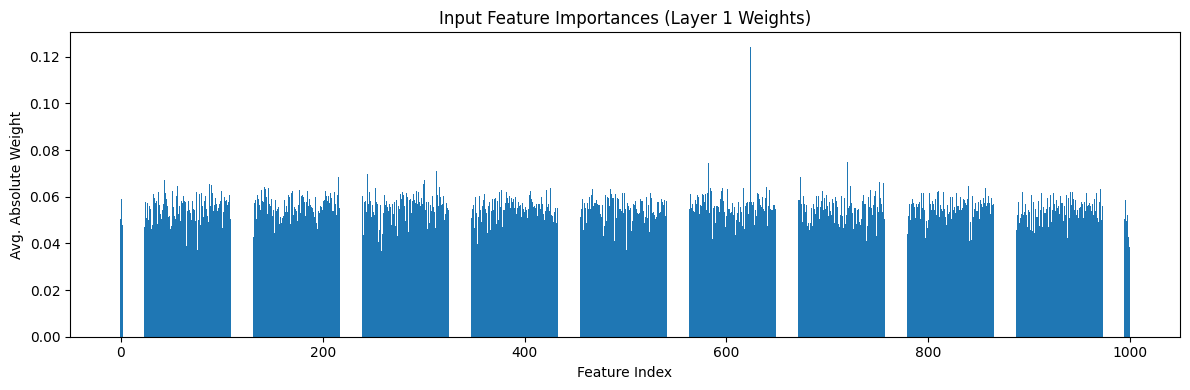

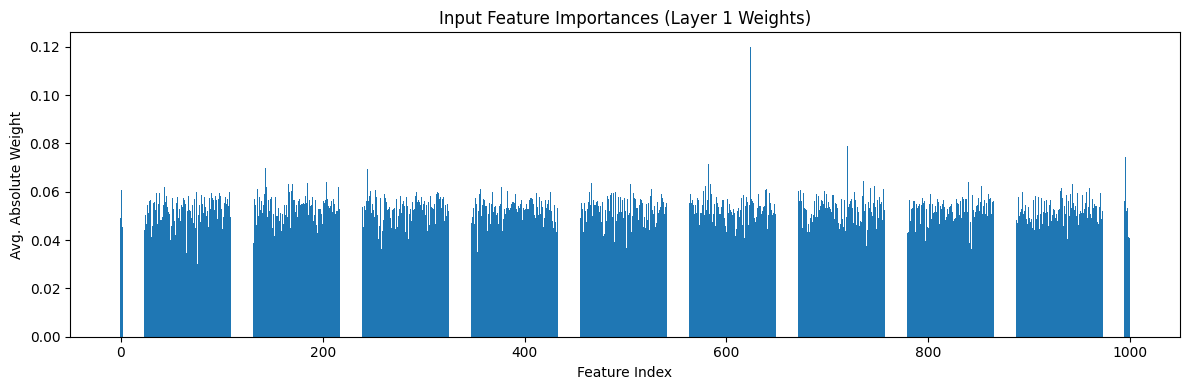

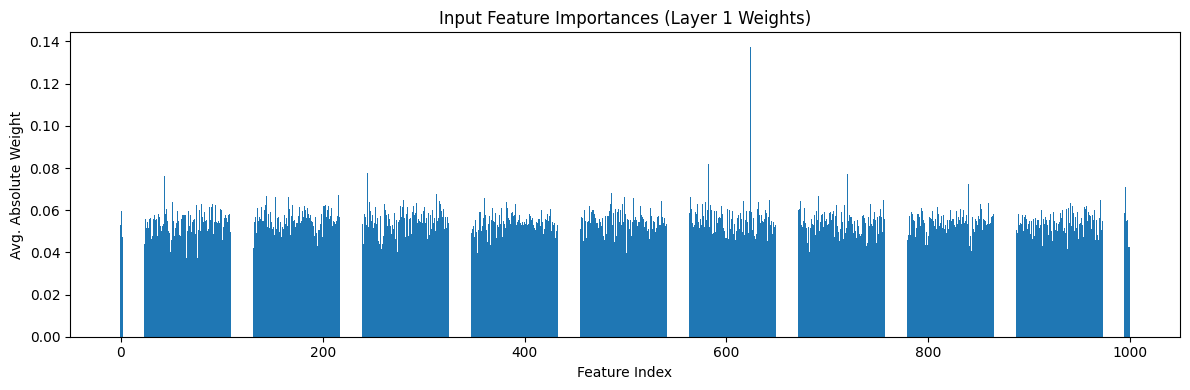

In [12]:
plotModel(model1)
plotMTLModel(model2)
plotMTLModel(model3)
plotMTLModel(model4)

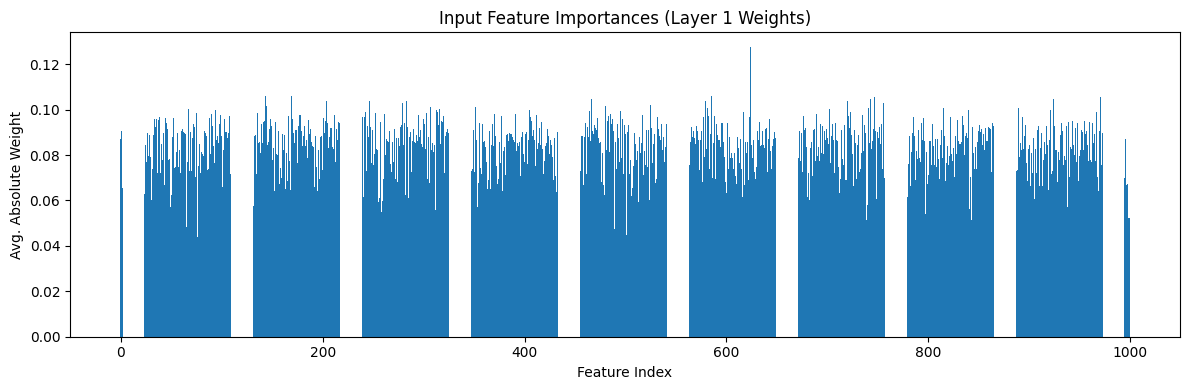

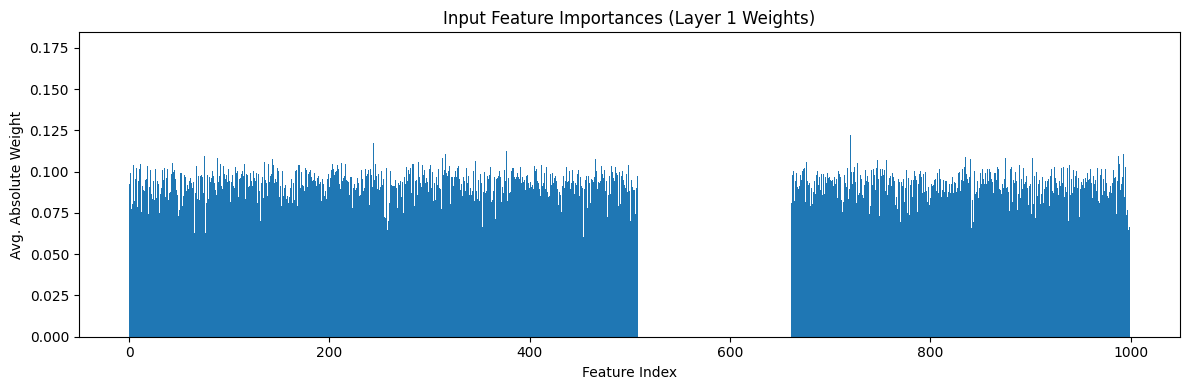

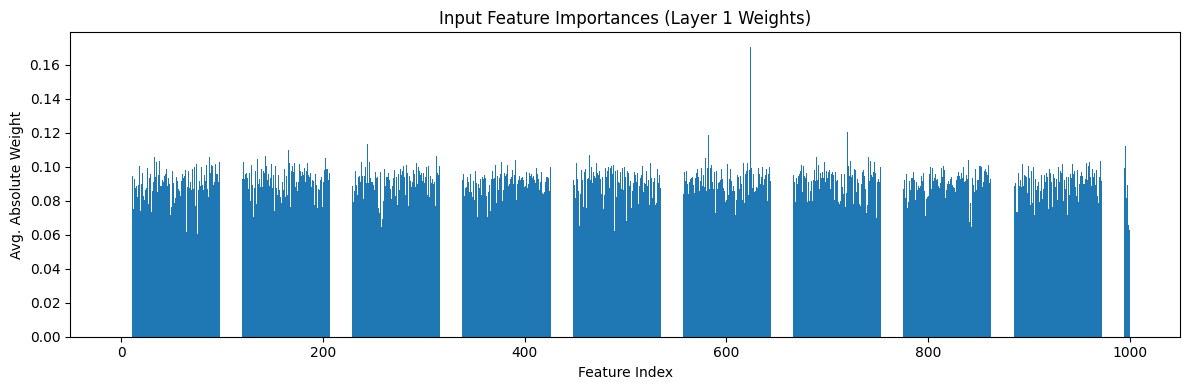

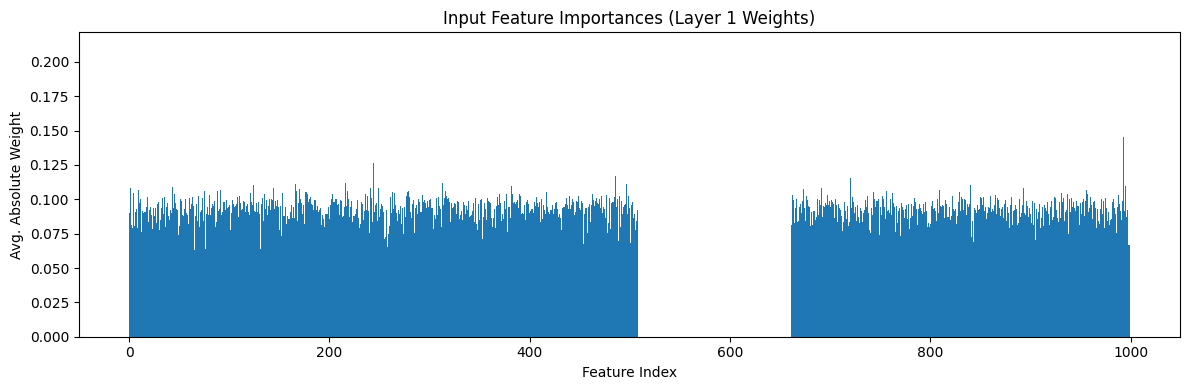

In [14]:
plotModel(model1)
plotMTLModel(model2)
plotMTLModel(model3)
plotMTLModel(model4)

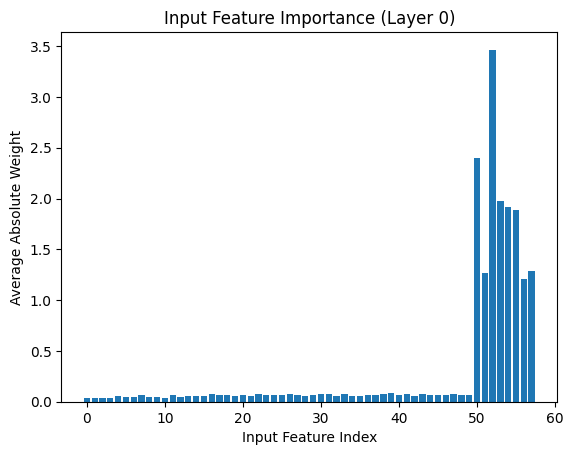

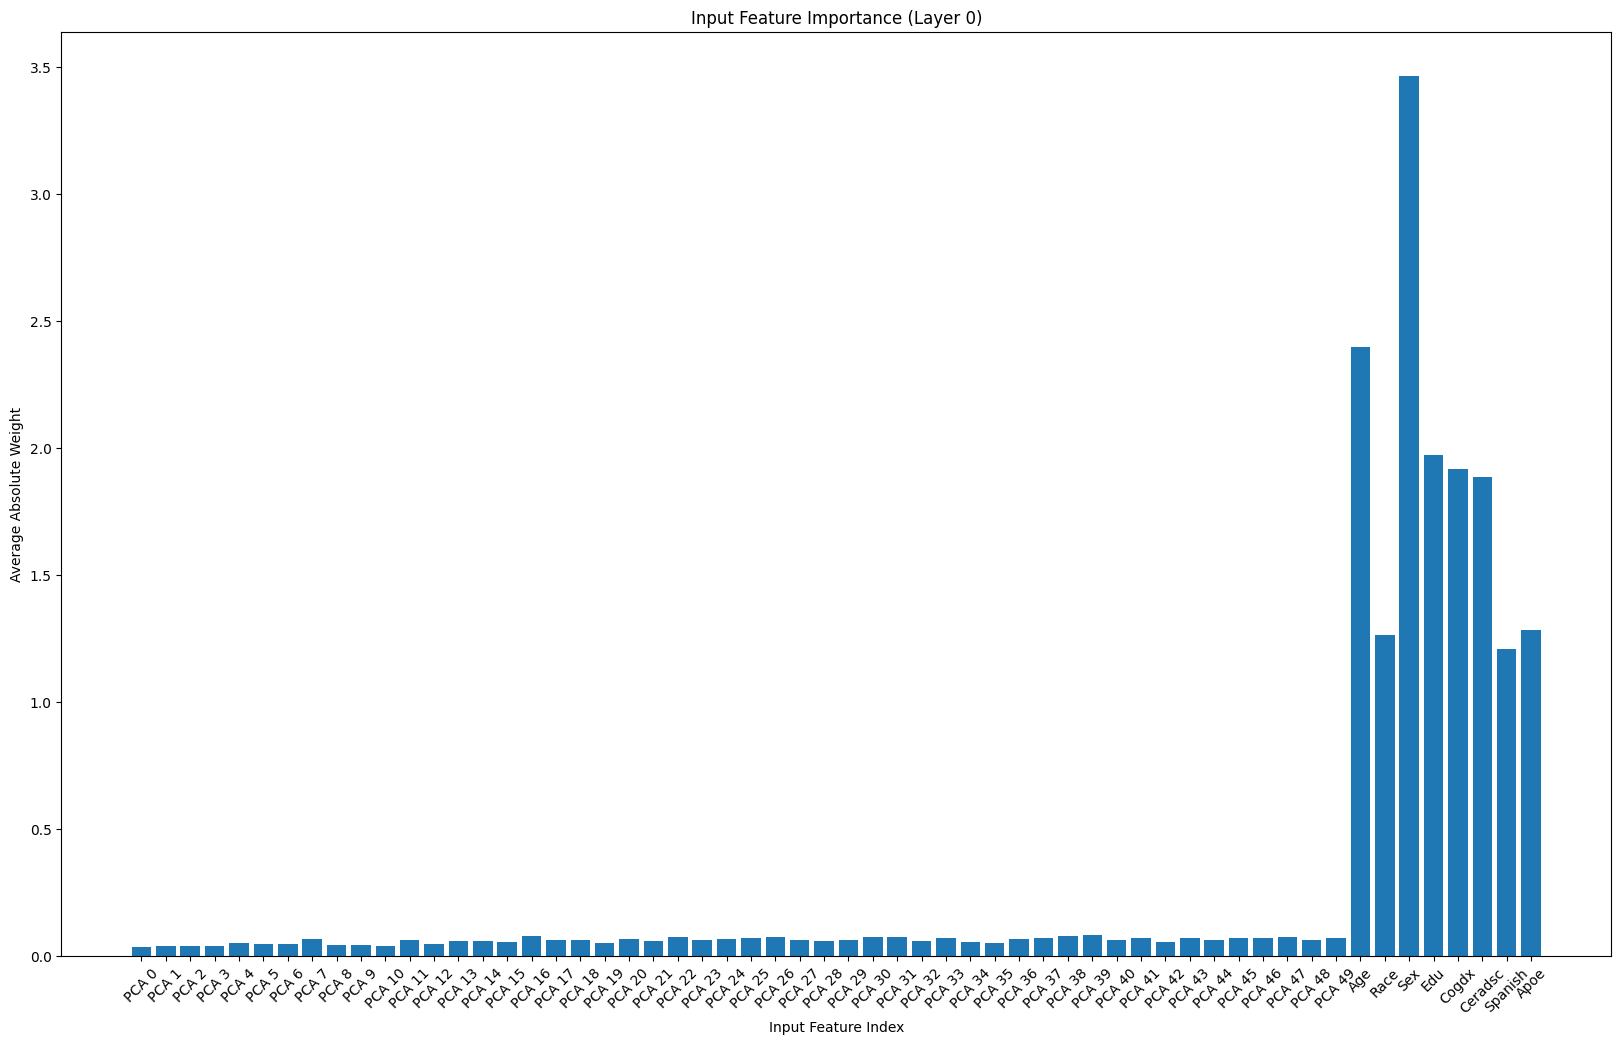

In [9]:
importance = input_weights.abs().mean(dim=0).numpy()  # Average absolute weight per input

plt.bar(range(len(importance)), importance)
plt.xlabel("Input Feature Index")
plt.ylabel("Average Absolute Weight")
plt.title("Input Feature Importance (Layer 0)")
feature_names = []
for i in range (50):
    feature_names.append("PCA " + str(i))
feature_names.append("Age")
feature_names.append("Race")
feature_names.append("Sex")
feature_names.append("Edu")
feature_names.append("Cogdx")
feature_names.append("Ceradsc")
feature_names.append("Spanish")
feature_names.append("Apoe")
#make the plot twice as wide
plt.figure(figsize=(20, 12))
plt.bar(feature_names, importance)
plt.xlabel("Input Feature Index")
plt.ylabel("Average Absolute Weight")
plt.title("Input Feature Importance (Layer 0)")
plt.xticks(rotation=45)



plt.show()

In [6]:
loss2Hidden = [0.955497, 0.772141, 0.689039, 0.615297, 0.567157, 0.516843, 0.488592, 0.457627, 0.431635, 0.420132, 0.397748, 0.388215, 0.384668, 0.366195, 0.359015]
loss3Hidden = [0.971372, 0.744617, 0.595040, 0.529556, 0.465191, 0.420803, 0.379487, 0.360037, 0.354270, 0.328418, 0.324788, 0.331254, 0.320524, 0.296573, 0.282448]
loss4Hidden = [0.873034, 0.606977, 0.488388, 0.427697, 0.371738, 0.324111, 0.308967, 0.291090, 0.260045, 0.252477, 0.256561, 0.250564, 0.236529, 0.232316, 0.209165]
loss5Hidden = [0.798370, 0.565561, 0.418101, 0.354076, 0.314085, 0.306898, 0.270133, 0.262561, 0.250550, 0.280145, 0.299683, 0.256663, 0.237542, 0.256791, 0.226777]

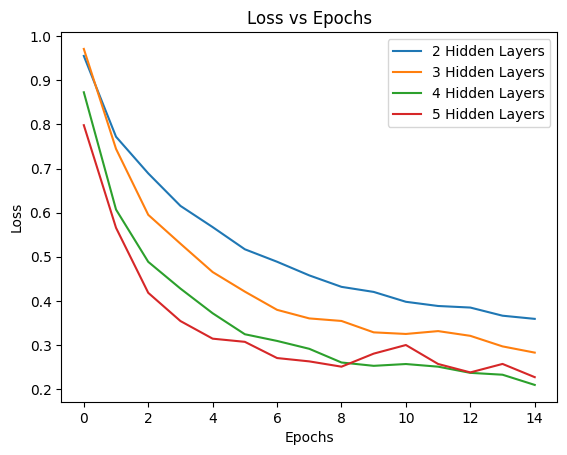

In [8]:
# plot all the losses
plt.plot(loss2Hidden, label='2 Hidden Layers')
plt.plot(loss3Hidden, label='3 Hidden Layers')
plt.plot(loss4Hidden, label='4 Hidden Layers')
plt.plot(loss5Hidden, label='5 Hidden Layers')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [13]:
fold1hidden4 = [0.905934, 0.660327, 0.501568, 0.413453, 0.350276, 0.305416, 0.274214, 0.272212, 0.262868, 0.249598, 0.239371, 0.222127, 0.252662, 0.220392, 0.227965]
fold1hidden5 = [0.816180, 0.536429, 0.431499, 0.403027, 0.317881, 0.295731, 0.292469, 0.277694, 0.281394, 0.234314, 0.260020, 0.252010, 0.240932, 0.225058, 0.224241]
fold2hidden4 = [0.916949, 0.651649, 0.528405, 0.439882, 0.374609, 0.335038, 0.346549, 0.321240, 0.272788, 0.272128, 0.255591, 0.249629, 0.243369, 0.236764, 0.220451]
fold2hidden5 = [0.747674, 0.519125, 0.429112, 0.404856, 0.376011, 0.331731, 0.319558, 0.287437, 0.294881, 0.281426, 0.243393, 0.261272, 0.264800, 0.251504, 0.247833]
fold3hidden4 = [0.888569, 0.666392, 0.502602, 0.428044, 0.384971, 0.347562, 0.324615, 0.336579, 0.285059, 0.291553, 0.264922, 0.270256, 0.243857, 0.278569, 0.233213]
fold3hidden5 = [0.814343, 0.525229, 0.392683, 0.351682, 0.333305, 0.320557, 0.280979, 0.268824, 0.252748, 0.238818, 0.283217, 0.240849, 0.221134, 0.225121, 0.211549]

averageHidden4 = []
averageHidden5 = []
for i in range(len(fold1hidden4)):
    averageHidden4.append((fold1hidden4[i] + fold2hidden4[i] + fold3hidden4[i]) / 3)
    averageHidden5.append((fold1hidden5[i] + fold2hidden5[i] + fold3hidden5[i]) / 3)

print(averageHidden4)
print(averageHidden5)


[0.9038173333333334, 0.659456, 0.5108583333333333, 0.4271263333333333, 0.369952, 0.32933866666666667, 0.31512599999999996, 0.31001033333333333, 0.2735716666666666, 0.271093, 0.25329466666666667, 0.2473373333333333, 0.24662933333333334, 0.24524166666666666, 0.22720966666666667]
[0.7927323333333334, 0.5269276666666666, 0.4177646666666666, 0.38652166666666665, 0.34239899999999995, 0.31600633333333333, 0.29766866666666664, 0.277985, 0.276341, 0.2515193333333333, 0.26221, 0.251377, 0.24228866666666668, 0.23389433333333334, 0.22787433333333332]


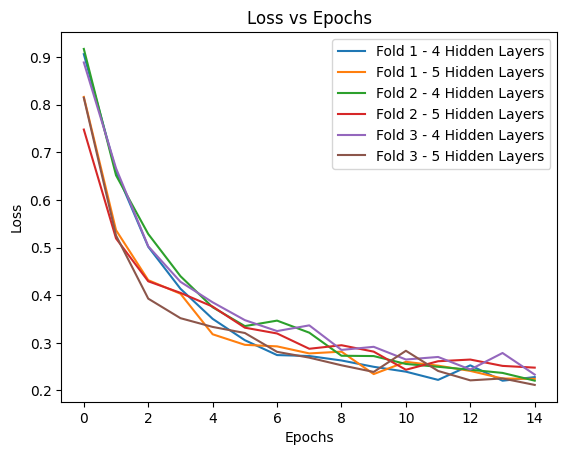

In [7]:
# plot all the losses
plt.plot(fold1hidden4, label='Fold 1 - 4 Hidden Layers')
plt.plot(fold1hidden5, label='Fold 1 - 5 Hidden Layers')
plt.plot(fold2hidden4, label='Fold 2 - 4 Hidden Layers')
plt.plot(fold2hidden5, label='Fold 2 - 5 Hidden Layers')
plt.plot(fold3hidden4, label='Fold 3 - 4 Hidden Layers')
plt.plot(fold3hidden5, label='Fold 3 - 5 Hidden Layers')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

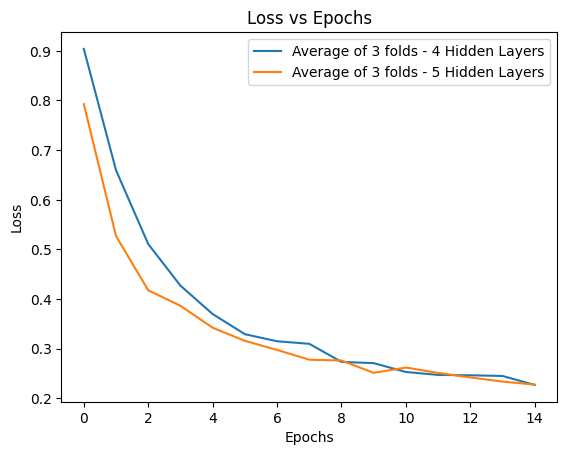

In [12]:
# plot all the losses
plt.plot(averageHidden4, label='Average of 3 folds - 4 Hidden Layers')
plt.plot(averageHidden5, label='Average of 3 folds - 5 Hidden Layers')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [3]:
braakScores = [8.054613590240479, 3.6667741537094116, 2.39245343208313, 1.7808557748794556, 1.4005931615829468, 1.5165624022483826, 1.483021080493927, 1.450774371623993, 1.4075300097465515, 1.3621533513069153, 1.368187427520752, 1.3578790426254272, 1.3647468090057373, 1.3540810942649841, 1.3458035588264465]
ceradScores = [1.723563015460968, 1.221682369709015, 1.2347514629364014, 1.1342536807060242, 1.0735207796096802, 1.0402344465255737, 0.9669623672962189, 0.9968970715999603, 0.9956142604351044, 0.9746761620044708, 0.9736155867576599, 1.0300333499908447, 1.0158488154411316, 1.0121183395385742, 1.027004212141037]
cogdxScores = [4.20413875579834, 3.086551785469055, 2.827959179878235, 2.7661887407302856, 2.248073101043701, 2.382889747619629, 2.537219285964966, 2.428877115249634, 2.550710916519165, 2.5888867378234863, 2.6259759664535522, 2.650144934654236, 2.68705415725708, 2.614919424057007, 2.7228143215179443]



Text(0.5, 1.0, 'Losses with 1k genes')

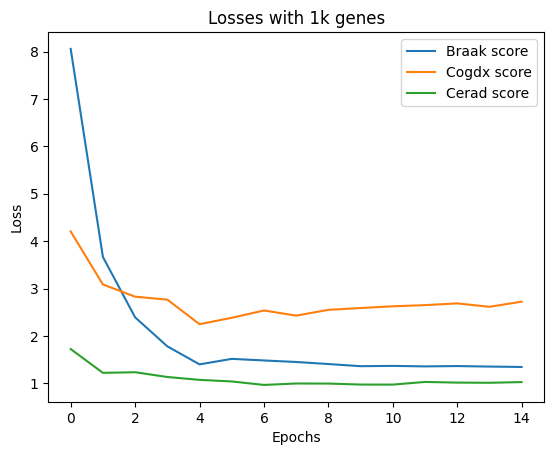

In [4]:
# plot this data
plt.plot(braakScores, label="Braak score")
plt.plot(cogdxScores, label="Cogdx score")
plt.plot(ceradScores, label="Cerad score")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Losses with 1k genes")


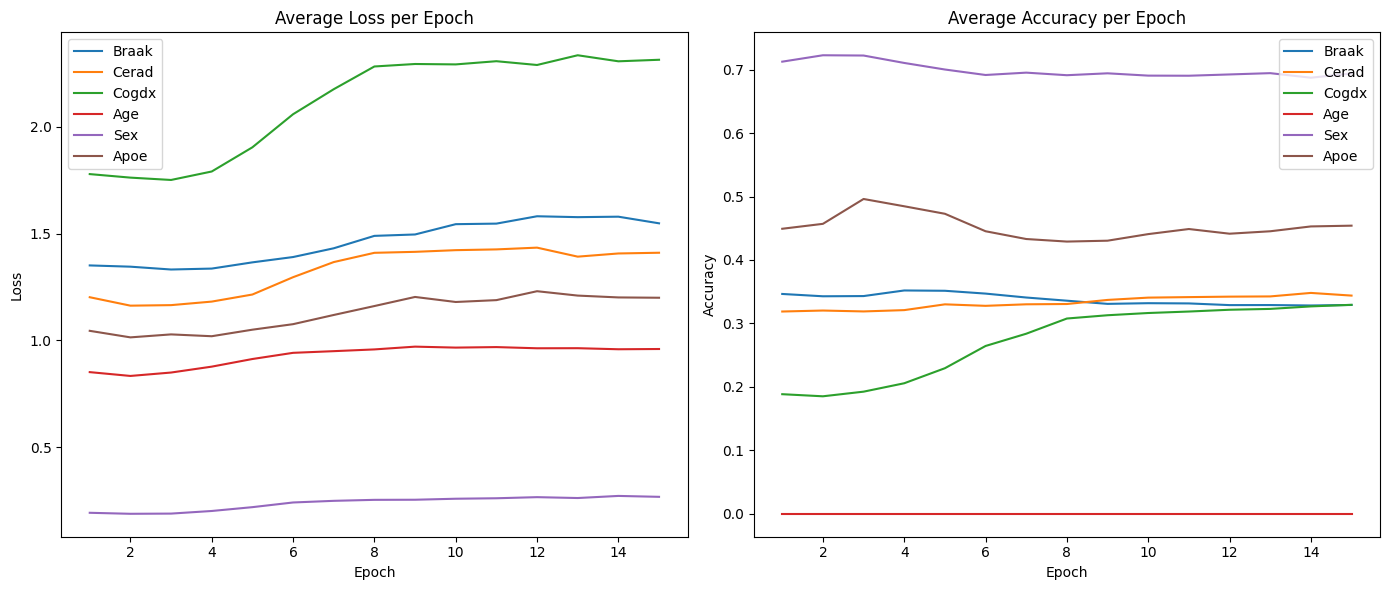

In [2]:
# open output.txt file and read the losses and accuracies for the measures

with open("output.txt", "r") as f:
    lines = f.readlines()
    
metrics = {
    'lossesBraak': [],
    'accuracyBraak': [],
    'lossesCerad': [],
    'accuracyCerad': [],
    'lossesCogdx': [],
    'accuracyCogdx': [],
    'lossesAge': [],
    'accuracyAge': [],
    'lossesSex': [],
    'accuracySex': [],
    'lossesApoe': [],
    'accuracyApoe': [],
}


for line in lines:
    for key in metrics.keys():
        if line.startswith(key):
            # Extract the list part using ast.literal_eval for safety
            values = ast.literal_eval(line.strip().split(': ')[1])
            metrics[key].append(values)

# Average across folds (axis=0 means across folds)
averaged_metrics = {key: np.mean(metrics[key], axis=0) for key in metrics}

# Plotting
epochs = list(range(1, len(averaged_metrics['lossesBraak']) + 1))
plt.figure(figsize=(14, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, averaged_metrics['lossesBraak'], label='Braak')
plt.plot(epochs, averaged_metrics['lossesCerad'], label='Cerad')
plt.plot(epochs, averaged_metrics['lossesCogdx'], label='Cogdx')
plt.plot(epochs, averaged_metrics['lossesAge'], label='Age')
plt.plot(epochs, averaged_metrics['lossesSex'], label='Sex')
plt.plot(epochs, averaged_metrics['lossesApoe'], label='Apoe')
plt.title('Average Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, averaged_metrics['accuracyBraak'], label='Braak')
plt.plot(epochs, averaged_metrics['accuracyCerad'], label='Cerad')
plt.plot(epochs, averaged_metrics['accuracyCogdx'], label='Cogdx')
plt.plot(epochs, averaged_metrics['accuracyAge'], label='Age')
plt.plot(epochs, averaged_metrics['accuracySex'], label='Sex')
plt.plot(epochs, averaged_metrics['accuracyApoe'], label='Apoe')
plt.title('Average Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [3]:
lossBraak = [0.3740815808773041, 0.3224924074411392, 0.31291877043247224, 0.3094384517073631, 0.30888154673576357, 0.30815379291772843, 0.3085384448170662, 0.31098515290021894, 0.3142215265631676, 0.3187618561387062]
accBraak = [0.3485009701445828, 0.3575139262690117, 0.35832759591913377, 0.36389810352381546, 0.3625837140890029, 0.36859235150528885, 0.36871753145146147, 0.364398823308506, 0.37272328972898544, 0.3687801214245478]
accpm1Braak = [0.7895725104838205, 0.8072228828941603, 0.8077236026788508, 0.8127933904988421, 0.8088502221944045, 0.8119171308756338, 0.8084746823558866, 0.7990235964198535, 0.8079739625711961, 0.8052200037553984]

lossBraakCerad = [0.5647404463291168, 0.5410389709472656, 0.535022556066513, 0.5328701566457749, 0.5320220273733139, 0.5316391912698746, 0.5312743253707886, 0.5312185479402542, 0.5313109775781631, 0.5311307460069656]
accBraakCerad = [0.33873693434311825, 0.3525067284221068, 0.3570757964574075, 0.36126932465419037, 0.3617700444388809, 0.36665206233961317, 0.36633911247418166, 0.36846717155911624, 0.37028228077861924, 0.36734055204356264]
accpm1BraakCerad = [0.7835638730675346, 0.7985228766351631, 0.8049070538899669, 0.8082243224635414, 0.8115415910371159, 0.8164236089378482, 0.8129185704450147, 0.8167365588032797, 0.8210552669462352, 0.8152343994492083]

lossBraakAge = [0.5797106075286865, 0.5523009276390076, 0.5427834870815277, 0.5380722796916961, 0.5356766395568847, 0.5339258856773377, 0.533024268746376, 0.5323853378295899, 0.5321049150228501, 0.5318893468379975]
accBraakAge = [0.2892282656318458, 0.2927958940977655, 0.3020592101145397, 0.31776929335920384, 0.3314764974651061, 0.3429930525129874, 0.35144269887963947, 0.35294485823371097, 0.35682543656506227, 0.3602052951117231]
accpm1BraakAge = [0.7227890092007261, 0.7263566376666458, 0.7398760718532891, 0.7628465919759655, 0.7776804155974213, 0.7876948112912311, 0.7978343869312137, 0.7984602866620767, 0.8022156850472554, 0.8082243224635414]

lossBraakCeradAge= [0.5796826696395874, 0.5513842344284058, 0.5419824912548065, 0.5380998227596283, 0.5357367498874664, 0.5343409812450409, 0.5335361477136612, 0.5328718265295028, 0.532550208568573, 0.532291298866272]
accBraakCeradAge = [0.3026225198723165, 0.2940476935594918, 0.3023095700068849, 0.31539087438192404, 0.3274707391875821, 0.3357952056080616, 0.34787507041371973, 0.34743694060211555, 0.35300744820679725, 0.35344557801840143]
accpm1BraakCeradAge = [0.7393753520685986, 0.7262314577204732, 0.7357451336295925, 0.751517806847343, 0.7657883207110221, 0.7788696250860612, 0.7941415785191213, 0.7936408587344308, 0.8005883457470113, 0.8001502159354071]

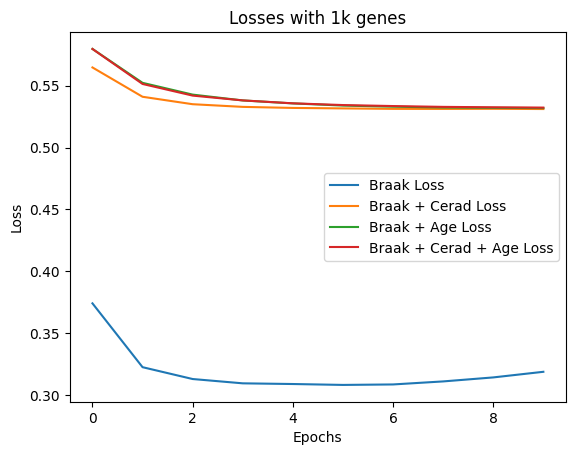

In [4]:
# plot this data
plt.plot(lossBraak, label='Braak Loss')
plt.plot(lossBraakCerad, label='Braak + Cerad Loss')
plt.plot(lossBraakAge, label='Braak + Age Loss')
plt.plot(lossBraakCeradAge, label='Braak + Cerad + Age Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Losses with 1k genes")
plt.show()


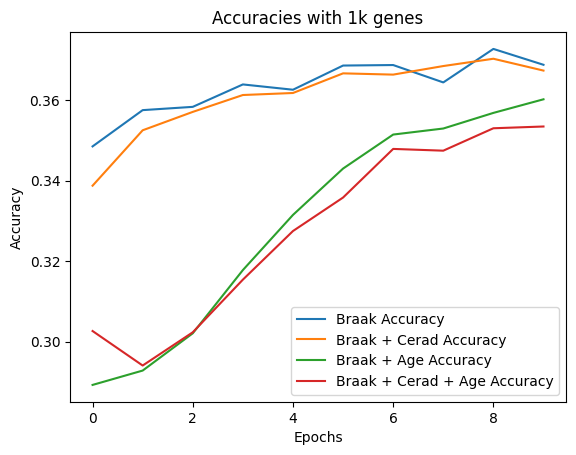

In [5]:
# plot this data
plt.plot(accBraak, label='Braak Accuracy')
plt.plot(accBraakCerad, label='Braak + Cerad Accuracy')
plt.plot(accBraakAge, label='Braak + Age Accuracy')
plt.plot(accBraakCeradAge, label='Braak + Cerad + Age Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracies with 1k genes")
plt.show()


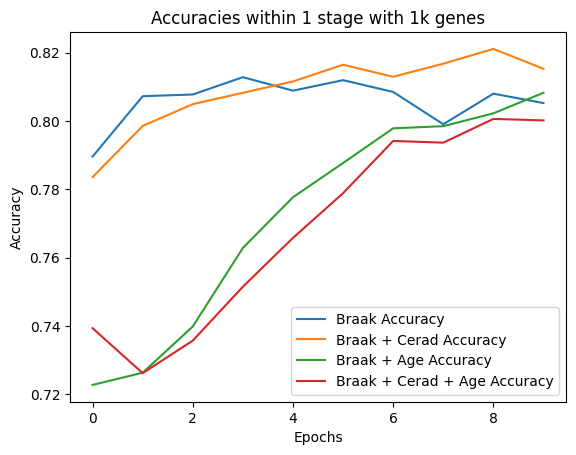

In [6]:
# plot this data
plt.plot(accpm1Braak, label='Braak Accuracy')
plt.plot(accpm1BraakCerad, label='Braak + Cerad Accuracy')
plt.plot(accpm1BraakAge, label='Braak + Age Accuracy')
plt.plot(accpm1BraakCeradAge, label='Braak + Cerad + Age Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracies within 1 stage with 1k genes")
plt.show()